In [2]:
import numpy as np
import torch
from torch.optim import Adam
from sklearn.gaussian_process import GaussianProcessRegressor



c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Example data (replace with your actual data)
X_train = np.random.rand(1000, 1)*23 - 7
y_train = -(X_train**4 - 10*X_train**3 -50*X_train**2 - 1*X_train + 1)
# Train the Gaussian Process model
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X_train, y_train)

# Define the objective function for optimization
def objective_function(X, clf):
    X = X.reshape(1, -1)
    y_pred = clf.predict(X)
    return -y_pred[0]  # We negate because we want to maximize y

# Initialize input tensor for optimization
init = np.random.rand(1, 1)
X_opt = {'X_point': torch.tensor(init, requires_grad=True, dtype=torch.float32)}

print(init)
# Define the optimizer
optimizer = Adam([X_opt['X_point']], lr=0.1)

# Optimization loop
num_iterations = 1000
for iteration in range(num_iterations):
    optimizer.zero_grad()
    loss = objective_function(X_opt['X_point'].detach().numpy())
    loss = torch.tensor(loss, requires_grad=True)
    loss.backward()
    optimizer.step()

# Output the optimized input
X_optimized = X_opt['X_point'].detach().numpy()
print("Optimized input X:", X_optimized)

[[0.17141835]]


TypeError: objective_function() missing 1 required positional argument: 'clf'

In [28]:
X_train = np.random.rand(1000, 1)*23 - 7
y_train = -(X_train**4 - 10*X_train**3 -50*X_train**2 - 1*X_train + 1)
# Train the Gaussian Process model
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X_train, y_train)

GaussianProcessRegressor(random_state=42)

In [66]:


def f(x):
    # 임의의 함수 예시 (사용자가 원하는 함수로 대체)
    return -np.sum((x - 2)**2)

# Numerical gradient 계산 함수
def numerical_gradient(f, x, epsilon=1e-8):
    grad = np.zeros_like(x)
    for i in range(x.size):
       # x = x.reshape(1, -1)
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
    return grad

# Adam Optimizer for Gradient Ascent
def adam_gradient_ascent(f, initial_x, learning_rate=0.01, max_iter=1000, tolerance=1e-9, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = initial_x
    m = np.zeros_like(x)  # Initialize the first moment vector
    v = np.zeros_like(x)  # Initialize the second moment vector
    t = 0  # Initialize timestep

    for i in range(max_iter):
        t += 1
        grad = numerical_gradient(f, x)
        
        m = beta1 * m + (1 - beta1) * grad  # Update biased first moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Update biased second moment estimate

        m_hat = m / (1 - beta1 ** t)  # Compute bias-corrected first moment estimate
        v_hat = v / (1 - beta2 ** t)  # Compute bias-corrected second moment estimate

        new_x = x + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Update the parameters
        
        # 수렴 조건 체크
        if np.linalg.norm(new_x - x) < tolerance:
            break
        x = new_x
       # print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")
    
    return x

# 초기 128차원 벡터 설정
#initial_x = np.random.randn(128)

# Adam Gradient Ascent 수행
#optimal_x = adam_gradient_ascent(f, initial_x)
#
#print("Optimal x:", optimal_x)
#print("Maximum value of f:", f(optimal_x))

In [45]:
optimal_x.shape

(128,)

In [68]:
initial_x = np.random.randn(5, 128)
initial_x[0].size

128

In [1]:
optimal_x

NameError: name 'optimal_x' is not defined

In [67]:
initial_x = np.random.randn(5, 128)

# Adam Gradient Ascent 수행
for a in range(initial_x.shape[0]):
    initial_point = np.array(initial_x[a])
    optimal_x = adam_gradient_ascent(f, initial_point)

print("Optimal x:", optimal_x)
print("Maximum value of f:", f(optimal_x))

x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.size: 128
x.si

KeyboardInterrupt: 

In [3]:
init = np.random.rand(1, 1)
X_opt = {'X_point': torch.tensor(init, requires_grad=True, dtype=torch.float32)}
X_opt['X_point']

tensor([[0.5664]], requires_grad=True)

In [82]:
X_train = np.random.rand(1000, 1)*23 - 7
y_train = -(X_train**4 - 10*X_train**3 -50*X_train**2 + 1)
# Train the Gaussian Process model
clf = GaussianProcessRegressor(random_state=42)
clf.fit(X_train, y_train)

GaussianProcessRegressor(random_state=42)

In [17]:
def f(x):
    # 임의의 함수 예시 (사용자가 원하는 함수로 대체)
    return clf.predict(x.reshape(1, -1))

# Numerical gradient 계산 함수
def numerical_gradient(f, x, epsilon=1e-8):
    grad = np.zeros_like(x)
    for i in range(x.size):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
    return grad

# Adam Optimizer for Gradient Ascent
def adam_gradient_ascent(f, initial_x, learning_rate=0.01, max_iter=1000, tolerance=1e-6, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = initial_x
    m = np.zeros_like(x)  # Initialize the first moment vector
    v = np.zeros_like(x)  # Initialize the second moment vector
    t = 0  # Initialize timestep

    for i in range(max_iter):
        t += 1
        grad = numerical_gradient(f, x, epsilon=epsilon)
        # weight decay
        # if lambda is not None:
        #     grad += lambda * x

        m = beta1 * m + (1 - beta1) * grad  # Update biased first moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Update biased second moment estimate

        m_hat = m / (1 - beta1 ** t)  # Compute bias-corrected first moment estimate
        v_hat = v / (1 - beta2 ** t)  # Compute bias-corrected second moment estimate

        new_x = x + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Update the parameters
        
        # 수렴 조건 체크
        if np.linalg.norm(new_x - x) < tolerance:
            break
        x = new_x
        #print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")
    
    return x

# 초기 128차원 벡터 설정
initial_x = np.random.randn(1,1)
initial_x = np.array([[-5]], dtype=np.float64)
print(f'initial: {initial_x}')

# Adam Gradient Ascent 수행
optimal_x = adam_gradient_ascent(f, initial_x)

print("Optimal x:", optimal_x)
print("Maximum value of f:", f(optimal_x))

initial: [[-5.]]
Optimal x: [[-2.49930151]]
Maximum value of f: [113.68797867]


In [80]:
# craete X_train with random number in between -5 and 18
X_train = np.random.rand(1000, 1)*23 - 7
y_train = -(X_train**4 - 10*X_train**3 -50*X_train**2 + 1)
y_train.shape

(1000, 1)

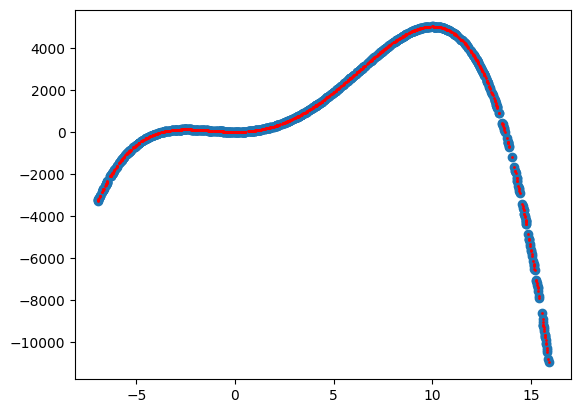

In [10]:
# print X_train and y_train as a plot
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.scatter(X_train, clf.predict(X_train), color='red', s=1)
plt.show()

### Try out with molecules

In [4]:
import sys
sys.path.append("..")
import moses
from moses.vae import VAE
from moses.vae_property import VAEPROPERTY
from moses.utils import CharVocab, StringDataset, SELFIESVocab
from moses.vae.trainer import VAETrainer
from moses.vae_property.trainer import VAEPROPERTYTrainer 

from moses.metrics import QED, SA, logP
from moses.utils import get_mol

import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools
import zipfile
from io import BytesIO

import selfies as sf

In [5]:
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{'[', 'H', '4', ')', 'c', 'B', 'F', ']', 'r', '#', '3', '(', 'n', 'N', 'S', '-', 'o', '1', '=', 's', '6', 'C', '2', 'l', '5', 'O'}


In [6]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_080.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [7]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [8]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))
#sample_logP = list(map(logP, sample_mol))
#sample_sa = list(map(SA, sample_mol))

In [9]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [10]:
for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _,_ = model.forward_encoder(input_batch)
    z = z.detach().cpu().numpy()
    break

In [11]:
sample_qed = pd.DataFrame({'QED': sample_qed})

In [13]:
def fit_gp(Z, y):
    clf = GaussianProcessRegressor(random_state=42)
    clf.fit(Z, y)
    return clf

def f(x, gaussian):

    return gaussian.predict(x.reshape(1,-1))[0]  ### 

In [14]:
#def f(x):
#    # 임의의 함수 예시 (사용자가 원하는 함수로 대체)
#    return -np.sum((x - 2)**2)

# Numerical gradient 계산 함수
def numerical_gradient(f, clf, x, epsilon=1e-8):
    grad = np.zeros_like(x)
    for i in range(x.size):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (f(x_plus, clf) - f(x_minus, clf)) / (2 * epsilon)
    return grad

# Adam Optimizer for Gradient Ascent
def adam_gradient_ascent(f, clf, initial_x, learning_rate=0.01, max_iter=1000, tolerance=1e-9, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = initial_x
    m = np.zeros_like(x)  # Initialize the first moment vector
    v = np.zeros_like(x)  # Initialize the second moment vector
    t = 0  # Initialize timestep

    for i in range(max_iter):
        t += 1
        grad = numerical_gradient(f, clf, x)
        
        m = beta1 * m + (1 - beta1) * grad  # Update biased first moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)  # Update biased second moment estimate

        m_hat = m / (1 - beta1 ** t)  # Compute bias-corrected first moment estimate
        v_hat = v / (1 - beta2 ** t)  # Compute bias-corrected second moment estimate

        new_x = x + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Update the parameters
        
        # 수렴 조건 체크
        if np.linalg.norm(new_x - x) < tolerance:
            break
        x = new_x
       # print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")
    
    return x

In [15]:
clf = fit_gp(z, sample_qed[:6000].values)

In [25]:
initial_x = np.random.randn(2, 128)
optimal_Xs = []
# Adam Gradient Ascent 수행
for a in range(initial_x.shape[0]):
    initial_point = np.array(initial_x[a])
    optimal_x = adam_gradient_ascent(f, clf, initial_point)
    optimal_Xs.append(optimal_x)

#print("Optimal x:", optimal_x)
#print("Maximum value of f:", f(optimal_x, clf))

In [49]:
optimal_Xs

[array([-0.83452885,  0.5510235 , -0.545189  ,  1.85901472,  0.0141096 ,
        -0.9775514 , -0.72440478, -0.35385916,  0.52367498, -0.71681907,
        -1.11885183,  0.04505519, -0.00520016,  0.81642335, -0.47091816,
        -0.93730988, -1.40757546,  0.09570605, -0.37944122, -0.52055509,
         0.66764032,  0.44050068,  0.97176611,  0.18132885, -1.00812567,
         1.73619095,  0.64116908,  0.34013126, -0.21926829,  1.08967782,
        -1.06514914, -0.19289215, -0.85447846, -0.67318335, -0.3063541 ,
         0.25088902,  0.85499539, -0.63582195, -1.6448751 ,  0.08874216,
         0.8455346 ,  2.54717771, -1.61267059,  0.02954707, -1.12804272,
         1.22665208, -0.87856438,  0.19615162, -1.18848515,  1.60902334,
         0.76606495,  2.48288015, -1.93241493, -0.27097904,  0.26914314,
        -0.85893038,  0.31878367, -0.14164915, -0.60248305, -0.99268231,
         0.96300544, -1.24942391, -0.47469864, -0.65571836,  0.66402693,
        -2.49711789,  0.93251592,  2.58201678, -1.4

In [53]:
sampled

['CC(C)C(=O)Nc1ccc(NC(=O)C2CCCO2)cc1',
 'CC(C)C(=O)Nc1ccc(NC(=O)CNC(=O)c2ccco2)cc1']

In [52]:
interps = np.array(optimal_Xs)
interps_torch = torch.from_numpy(interps)
interps_torch = torch.tensor(interps_torch, dtype=torch.float32)
model.eval()
print(interps_torch.shape)
#sampled, new_x = model.sample(n, z=torch.from_numpy(np.zeros((8, 128), dtype=np.float32)), test=True) 
sampled = model.sample(interps_torch.shape[0], z=interps_torch, temp=1.0, test=True)
sampled_df = pd.DataFrame(sampled, columns=['SMILES'])
sampled_df['Romol'] = sampled_df['SMILES'].apply(Chem.MolFromSmiles)
sampled_df['opt_z'] = optimal_Xs
sampled_df['QED'] = sampled_df['Romol'].apply(QED)
sampled_df['logP'] = sampled_df['Romol'].apply(logP)
sampled_df['SA'] = sampled_df['Romol'].apply(SA)
sampled_df['objective'] = 5*sampled_df['QED'] - sampled_df['SA']
sampled_df['pred objective'] = sampled_df['opt_z'].apply(f, args=(clf,))
# drop 'Romol'
sampled_df = sampled_df.drop(columns=['Romol'])

C:\Users\lisa0\AppData\Local\Temp\ipykernel_6528\2620058208.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


torch.Size([2, 128])


In [43]:
config.use_selfies

False

In [44]:
sampled_df

,SMILES,opt_z,QED,logP,SA,objective,pred objective
0,CC(C)C(=O)Nc1ccc(NC(=O)C2CCCO2)cc1,"[-0.8345288491463796, 0.5510235035122257, -0.5...",0.886995,2.3986,2.290674,2.144301,2.815161e-29
1,CC(C)C(=O)Nc1ccc(NC(=O)CNC(=O)c2ccco2)cc1,"[-0.41774201980544284, 1.2026477509817664, -1....",0.756371,2.2426,1.864765,1.917092,1.063013e-31


In [38]:
sampled_df.loc[0,'opt_z'].shape

(128,)